<a href="https://colab.research.google.com/github/DiptoPramanik/Student-Stress-Analysis-and-Prediction/blob/main/Student_Stress_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [48]:
df = pd.read_csv("/content/drive/MyDrive/Student Stress Prediction/StressLevelDataset.csv")
df.sample(5)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
682,14,15,0,10,2,1,2,4,2,3,...,2,2,3,2,3,2,3,3,2,1
78,13,17,1,12,3,1,2,4,2,2,...,3,3,3,3,2,2,2,3,2,1
684,11,15,1,11,2,1,2,4,2,3,...,3,2,2,2,3,3,2,3,2,1
616,20,15,1,26,4,3,1,4,4,2,...,2,1,5,1,4,1,5,5,4,2
37,7,27,0,8,1,2,5,2,2,4,...,5,5,2,5,1,3,1,1,1,0


In [ ]:
df.shape

(1100, 21)

In [ ]:
df.isnull().sum()

,0
anxiety_level,0
self_esteem,0
mental_health_history,0
depression,0
headache,0
blood_pressure,0
sleep_quality,0
breathing_problem,0
noise_level,0
living_conditions,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [ ]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


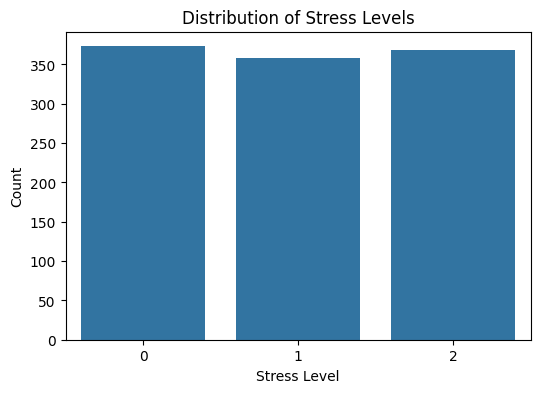

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stress_level', data=df)
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

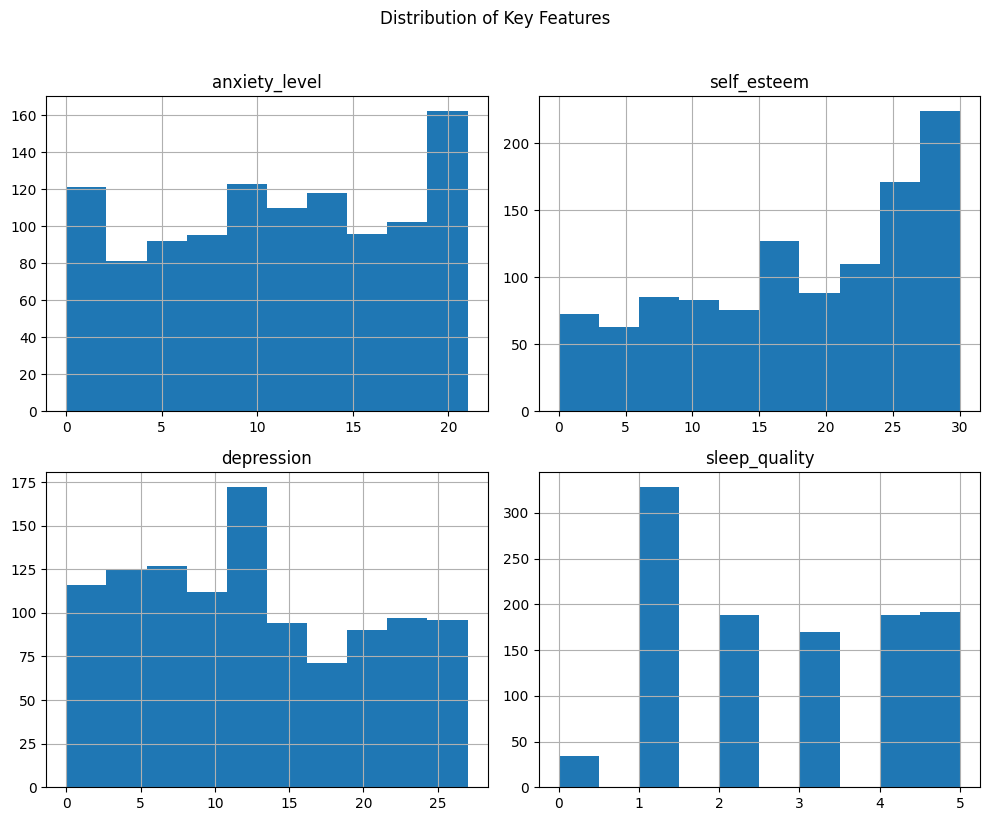

In [ ]:
features_to_visualize = ['anxiety_level', 'self_esteem', 'depression', 'sleep_quality']
df[features_to_visualize].hist(figsize=(10, 8))
plt.suptitle('Distribution of Key Features', y=1.02)
plt.tight_layout()
plt.show()

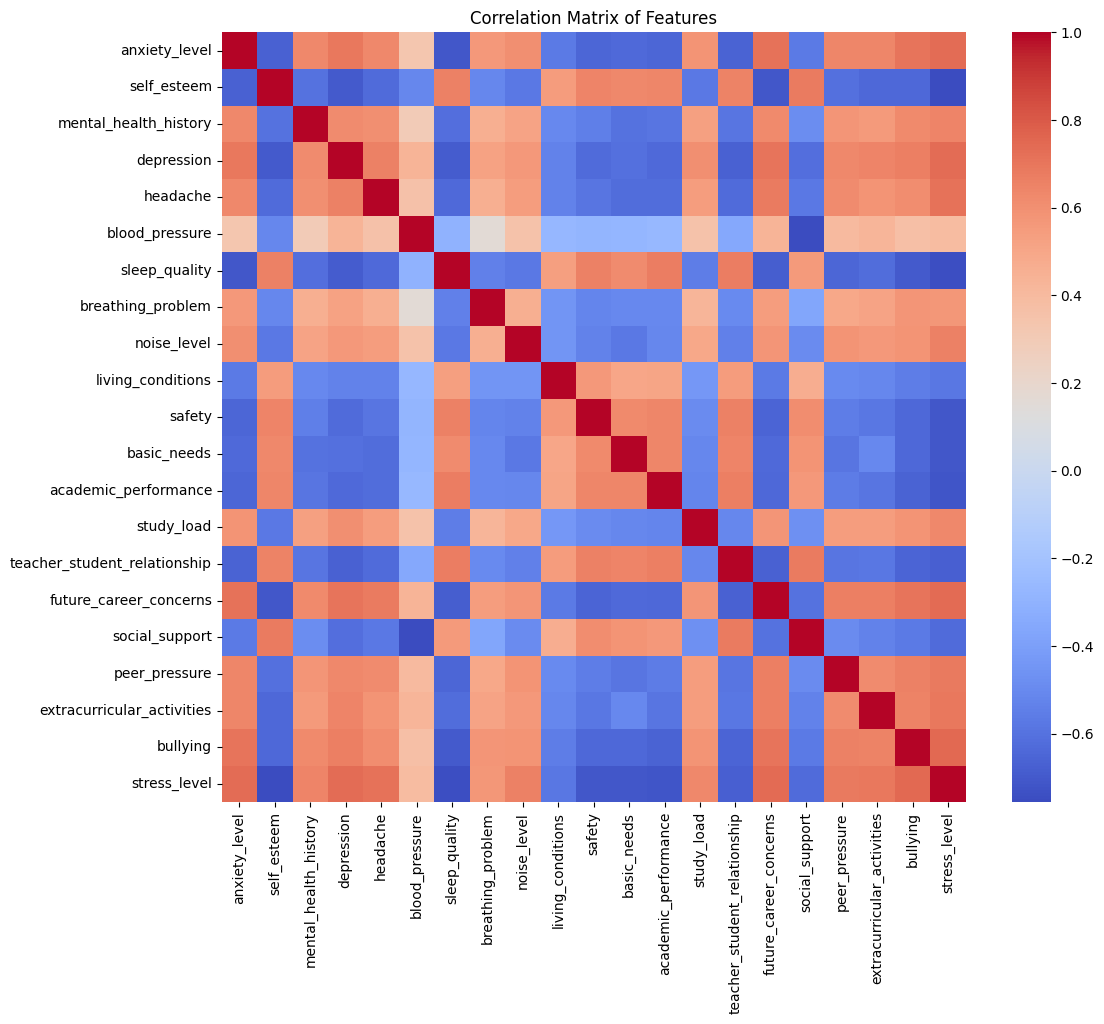

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
X = df.drop('stress_level', axis=1)
y = df['stress_level']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
# lr.score(X_test,y_test)

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        76
           1       0.93      0.85      0.89        73
           2       0.86      0.90      0.88        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


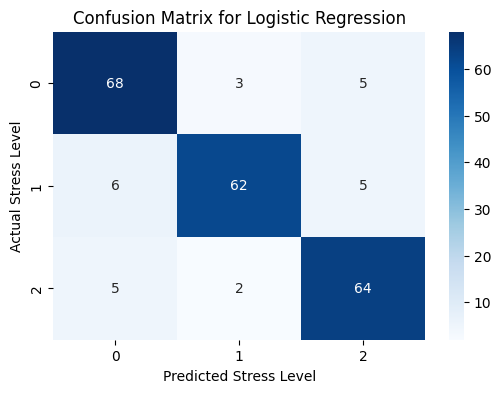

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the Naive Bayes model
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted Stress Level')
plt.ylabel('Actual Stress Level')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        76
           1       0.87      0.90      0.89        73
           2       0.88      0.86      0.87        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the Naive Bayes model
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted Stress Level')
plt.ylabel('Actual Stress Level')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.90      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

print("Support Vector Machine (SVM) Classifier Report:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM) Classifier Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91        76
           1       0.90      0.88      0.89        73
           2       0.86      0.93      0.89        71

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

print("K-Nearest Neighbors (KNN) Classifier Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Classifier Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        76
           1       0.84      0.89      0.87        73
           2       0.86      0.87      0.87        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



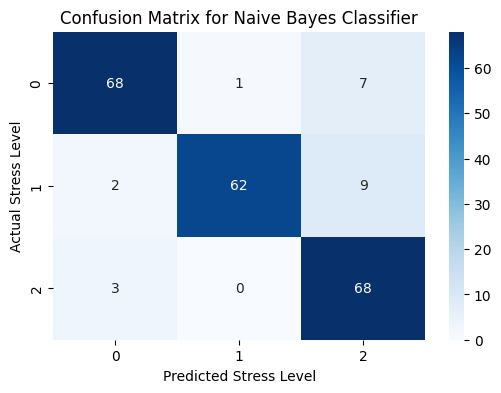

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the Naive Bayes model
cm = confusion_matrix(y_test, y_pred_nb)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted Stress Level')
plt.ylabel('Actual Stress Level')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

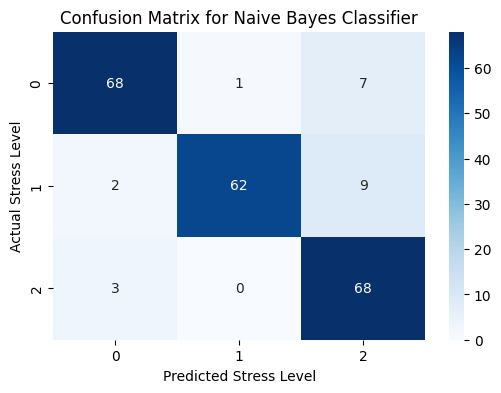

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the Naive Bayes model
cm = confusion_matrix(y_test, y_pred_nb)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted Stress Level')
plt.ylabel('Actual Stress Level')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

print("Naive Bayes Classifier Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        76
           1       0.98      0.85      0.91        73
           2       0.81      0.96      0.88        71

    accuracy                           0.90       220
   macro avg       0.91      0.90      0.90       220
weighted avg       0.91      0.90      0.90       220



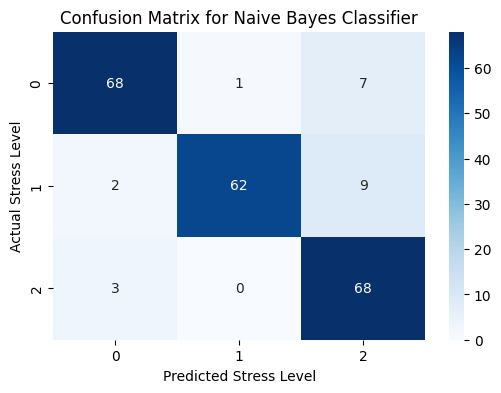

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the Naive Bayes model
cm = confusion_matrix(y_test, y_pred_nb)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted Stress Level')
plt.ylabel('Actual Stress Level')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

/tmp/ipython-input-4071151173.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


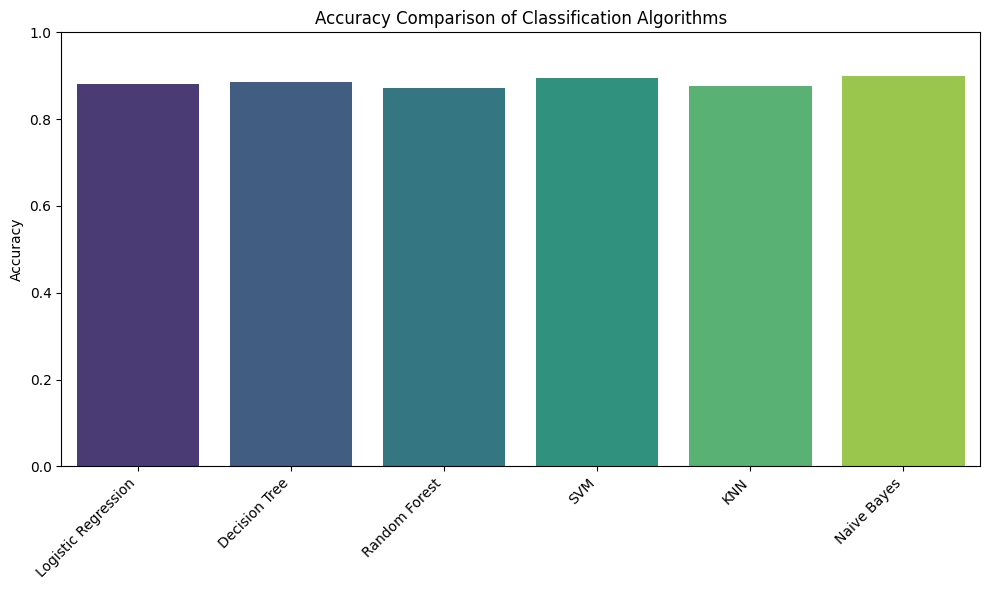

In [ ]:
# Extract accuracies from the classification reports
# Assuming you have already run the cells to get y_pred for each model
# If not, you will need to run those cells first

from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(y_test, y_pred)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_nb = accuracy_score(y_test, y_pred_nb)


models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes']
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_knn, accuracy_nb]

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1.0)
plt.title('Accuracy Comparison of Classification Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()